In [142]:
import pandas as pd
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

# 깨짐 방지를 위한 Font 지정
import os
if os.name =='nt' : 
    font_family = "Malgun Gothic"
else :
    font_family = "AppleGothic"

# 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

In [160]:
gg = pd.read_csv('./전처리데이터_수정.csv', encoding = "euc-kr")
cor = pd.DataFrame(gg)
cor.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,충전소,시군구,시군구코드,총생산인구수,총인구수,공시지가,차고지개수,주차장개수,도시공원_개수,총생산,주유소개수
0,0,0,0,상암수소충전소,마포구,11440,269063,361126,9.212986e+06,0,17,9,19943128.0,12
1,1,1,1,마곡에코수소충전소,강서구,11500,412637,569517,4.485313e+06,1,21,20,17458926.0,33
2,2,2,2,오곡수소충전소,강서구,11500,412637,569517,4.485313e+06,1,21,20,17458926.0,33
3,3,3,3,H국회수소충전소,영등포구,11560,267893,369264,6.240179e+06,0,46,8,36095497.0,27
4,4,4,4,양재수소충전소,서초구,11650,285142,397098,1.114056e+07,0,22,0,35570338.0,30


In [161]:
cor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.2  113 non-null    int64  
 1   Unnamed: 0.1  113 non-null    int64  
 2   Unnamed: 0    113 non-null    int64  
 3   충전소           113 non-null    object 
 4   시군구           113 non-null    object 
 5   시군구코드         113 non-null    int64  
 6   총생산인구수        113 non-null    int64  
 7   총인구수          113 non-null    int64  
 8   공시지가          113 non-null    float64
 9   차고지개수         113 non-null    int64  
 10  주차장개수         113 non-null    int64  
 11  도시공원_개수       113 non-null    int64  
 12  총생산           113 non-null    float64
 13  주유소개수         113 non-null    int64  
dtypes: float64(2), int64(10), object(2)
memory usage: 12.5+ KB


In [162]:
del cor['Unnamed: 0']
del cor['Unnamed: 0.1']
del cor['Unnamed: 0.2']

In [163]:
cor

,충전소,시군구,시군구코드,총생산인구수,총인구수,공시지가,차고지개수,주차장개수,도시공원_개수,총생산,주유소개수
0,상암수소충전소,마포구,11440,269063,361126,9.212986e+06,0,17,9,19943128.0,12
1,마곡에코수소충전소,강서구,11500,412637,569517,4.485313e+06,1,21,20,17458926.0,33
2,오곡수소충전소,강서구,11500,412637,569517,4.485313e+06,1,21,20,17458926.0,33
3,H국회수소충전소,영등포구,11560,267893,369264,6.240179e+06,0,46,8,36095497.0,27
4,양재수소충전소,서초구,11650,285142,397098,1.114056e+07,0,22,0,35570338.0,30
...,...,...,...,...,...,...,...,...,...,...,...
108,하이넷 통영용남수소충전소,통영시,48220,81212,124236,2.569437e+05,1,18,11,3096258.0,31
109,김해수소충전소,김해시,48250,386937,527523,4.811262e+05,3,42,31,16058319.0,177
110,하이넷 거제장평수소충전소,거제시,48310,169504,237546,3.297274e+05,0,8,15,9535962.0,52
111,양산시증산수소충전소,양산시,48330,244781,349290,4.314398e+05,1,21,28,10952945.0,75


In [164]:
Hyd = pd.read_csv('./전국시군구_수소충전소개수.csv', encoding = "euc-kr")
Hyd_df = pd.DataFrame(Hyd)
Hyd_df.head()

,시군구코드,수소충전소개수
0,31710,4
1,41590,4
2,28110,3
3,41550,3
4,31140,3


In [165]:
cor = pd.merge(cor, Hyd_df, on = '시군구코드', how = 'left')
cor

,충전소,시군구,시군구코드,총생산인구수,총인구수,공시지가,차고지개수,주차장개수,도시공원_개수,총생산,주유소개수,수소충전소개수
0,상암수소충전소,마포구,11440,269063,361126,9.212986e+06,0,17,9,19943128.0,12,1
1,마곡에코수소충전소,강서구,11500,412637,569517,4.485313e+06,1,21,20,17458926.0,33,2
2,오곡수소충전소,강서구,11500,412637,569517,4.485313e+06,1,21,20,17458926.0,33,2
3,H국회수소충전소,영등포구,11560,267893,369264,6.240179e+06,0,46,8,36095497.0,27,1
4,양재수소충전소,서초구,11650,285142,397098,1.114056e+07,0,22,0,35570338.0,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...
108,하이넷 통영용남수소충전소,통영시,48220,81212,124236,2.569437e+05,1,18,11,3096258.0,31,1
109,김해수소충전소,김해시,48250,386937,527523,4.811262e+05,3,42,31,16058319.0,177,1
110,하이넷 거제장평수소충전소,거제시,48310,169504,237546,3.297274e+05,0,8,15,9535962.0,52,1
111,양산시증산수소충전소,양산시,48330,244781,349290,4.314398e+05,1,21,28,10952945.0,75,1


In [166]:
del cor['시군구코드']

In [167]:
cor

,충전소,시군구,총생산인구수,총인구수,공시지가,차고지개수,주차장개수,도시공원_개수,총생산,주유소개수,수소충전소개수
0,상암수소충전소,마포구,269063,361126,9.212986e+06,0,17,9,19943128.0,12,1
1,마곡에코수소충전소,강서구,412637,569517,4.485313e+06,1,21,20,17458926.0,33,2
2,오곡수소충전소,강서구,412637,569517,4.485313e+06,1,21,20,17458926.0,33,2
3,H국회수소충전소,영등포구,267893,369264,6.240179e+06,0,46,8,36095497.0,27,1
4,양재수소충전소,서초구,285142,397098,1.114056e+07,0,22,0,35570338.0,30,1
...,...,...,...,...,...,...,...,...,...,...,...
108,하이넷 통영용남수소충전소,통영시,81212,124236,2.569437e+05,1,18,11,3096258.0,31,1
109,김해수소충전소,김해시,386937,527523,4.811262e+05,3,42,31,16058319.0,177,1
110,하이넷 거제장평수소충전소,거제시,169504,237546,3.297274e+05,0,8,15,9535962.0,52,1
111,양산시증산수소충전소,양산시,244781,349290,4.314398e+05,1,21,28,10952945.0,75,1


In [168]:
cor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 112
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   충전소      113 non-null    object 
 1   시군구      113 non-null    object 
 2   총생산인구수   113 non-null    int64  
 3   총인구수     113 non-null    int64  
 4   공시지가     113 non-null    float64
 5   차고지개수    113 non-null    int64  
 6   주차장개수    113 non-null    int64  
 7   도시공원_개수  113 non-null    int64  
 8   총생산      113 non-null    float64
 9   주유소개수    113 non-null    int64  
 10  수소충전소개수  113 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 10.6+ KB


In [169]:
cor.fillna(0)

,충전소,시군구,총생산인구수,총인구수,공시지가,차고지개수,주차장개수,도시공원_개수,총생산,주유소개수,수소충전소개수
0,상암수소충전소,마포구,269063,361126,9.212986e+06,0,17,9,19943128.0,12,1
1,마곡에코수소충전소,강서구,412637,569517,4.485313e+06,1,21,20,17458926.0,33,2
2,오곡수소충전소,강서구,412637,569517,4.485313e+06,1,21,20,17458926.0,33,2
3,H국회수소충전소,영등포구,267893,369264,6.240179e+06,0,46,8,36095497.0,27,1
4,양재수소충전소,서초구,285142,397098,1.114056e+07,0,22,0,35570338.0,30,1
...,...,...,...,...,...,...,...,...,...,...,...
108,하이넷 통영용남수소충전소,통영시,81212,124236,2.569437e+05,1,18,11,3096258.0,31,1
109,김해수소충전소,김해시,386937,527523,4.811262e+05,3,42,31,16058319.0,177,1
110,하이넷 거제장평수소충전소,거제시,169504,237546,3.297274e+05,0,8,15,9535962.0,52,1
111,양산시증산수소충전소,양산시,244781,349290,4.314398e+05,1,21,28,10952945.0,75,1


In [175]:
cor

,충전소,시군구,총생산인구수,총인구수,공시지가,차고지개수,주차장개수,도시공원_개수,총생산,주유소개수,수소충전소개수
0,상암수소충전소,마포구,269063,361126,9.212986e+06,0,17,9,19943128.0,12,1
1,마곡에코수소충전소,강서구,412637,569517,4.485313e+06,1,21,20,17458926.0,33,2
2,오곡수소충전소,강서구,412637,569517,4.485313e+06,1,21,20,17458926.0,33,2
3,H국회수소충전소,영등포구,267893,369264,6.240179e+06,0,46,8,36095497.0,27,1
4,양재수소충전소,서초구,285142,397098,1.114056e+07,0,22,0,35570338.0,30,1
...,...,...,...,...,...,...,...,...,...,...,...
108,하이넷 통영용남수소충전소,통영시,81212,124236,2.569437e+05,1,18,11,3096258.0,31,1
109,김해수소충전소,김해시,386937,527523,4.811262e+05,3,42,31,16058319.0,177,1
110,하이넷 거제장평수소충전소,거제시,169504,237546,3.297274e+05,0,8,15,9535962.0,52,1
111,양산시증산수소충전소,양산시,244781,349290,4.314398e+05,1,21,28,10952945.0,75,1


In [176]:
del cor['충전소']
del cor['시군구']
cor

,총생산인구수,총인구수,공시지가,차고지개수,주차장개수,도시공원_개수,총생산,주유소개수,수소충전소개수
0,269063,361126,9.212986e+06,0,17,9,19943128.0,12,1
1,412637,569517,4.485313e+06,1,21,20,17458926.0,33,2
2,412637,569517,4.485313e+06,1,21,20,17458926.0,33,2
3,267893,369264,6.240179e+06,0,46,8,36095497.0,27,1
4,285142,397098,1.114056e+07,0,22,0,35570338.0,30,1
...,...,...,...,...,...,...,...,...,...
108,81212,124236,2.569437e+05,1,18,11,3096258.0,31,1
109,386937,527523,4.811262e+05,3,42,31,16058319.0,177,1
110,169504,237546,3.297274e+05,0,8,15,9535962.0,52,1
111,244781,349290,4.314398e+05,1,21,28,10952945.0,75,1


In [177]:
cor.to_csv("분석용데이터_상관계수.csv", encoding = "EUC-KR")

In [170]:
cor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 112
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   충전소      113 non-null    object 
 1   시군구      113 non-null    object 
 2   총생산인구수   113 non-null    int64  
 3   총인구수     113 non-null    int64  
 4   공시지가     113 non-null    float64
 5   차고지개수    113 non-null    int64  
 6   주차장개수    113 non-null    int64  
 7   도시공원_개수  113 non-null    int64  
 8   총생산      113 non-null    float64
 9   주유소개수    113 non-null    int64  
 10  수소충전소개수  113 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 10.6+ KB


# 상관계수

In [171]:
co = cor.corr()
co

,총생산인구수,총인구수,공시지가,차고지개수,주차장개수,도시공원_개수,총생산,주유소개수,수소충전소개수
총생산인구수,1.000000,0.998740,0.266641,0.302960,0.336671,0.454130,0.741466,0.592275,0.341193
총인구수,0.998740,1.000000,0.262820,0.308620,0.339006,0.454380,0.740247,0.600480,0.328615
공시지가,0.266641,0.262820,1.000000,-0.112653,0.098347,-0.173478,0.193153,-0.319159,-0.150980
차고지개수,0.302960,0.308620,-0.112653,1.000000,0.146473,0.102250,0.301170,0.426347,0.024129
주차장개수,0.336671,0.339006,0.098347,0.146473,1.000000,0.295270,0.118626,0.089452,-0.098114
도시공원_개수,0.454130,0.454380,-0.173478,0.102250,0.295270,1.000000,0.381684,0.499840,0.224256
총생산,0.741466,0.740247,0.193153,0.301170,0.118626,0.381684,1.000000,0.714175,0.530455
주유소개수,0.592275,0.600480,-0.319159,0.426347,0.089452,0.499840,0.714175,1.000000,0.518004
수소충전소개수,0.341193,0.328615,-0.150980,0.024129,-0.098114,0.224256,0.530455,0.518004,1.000000


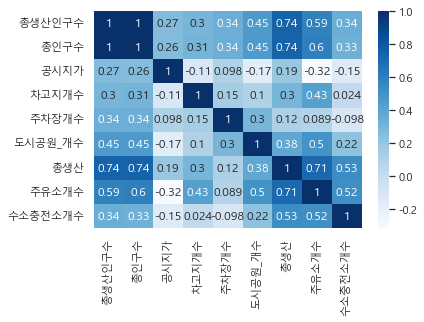

In [172]:
sns.heatmap(co, annot = True, cmap = plt.cm.Blues)
plt.show()

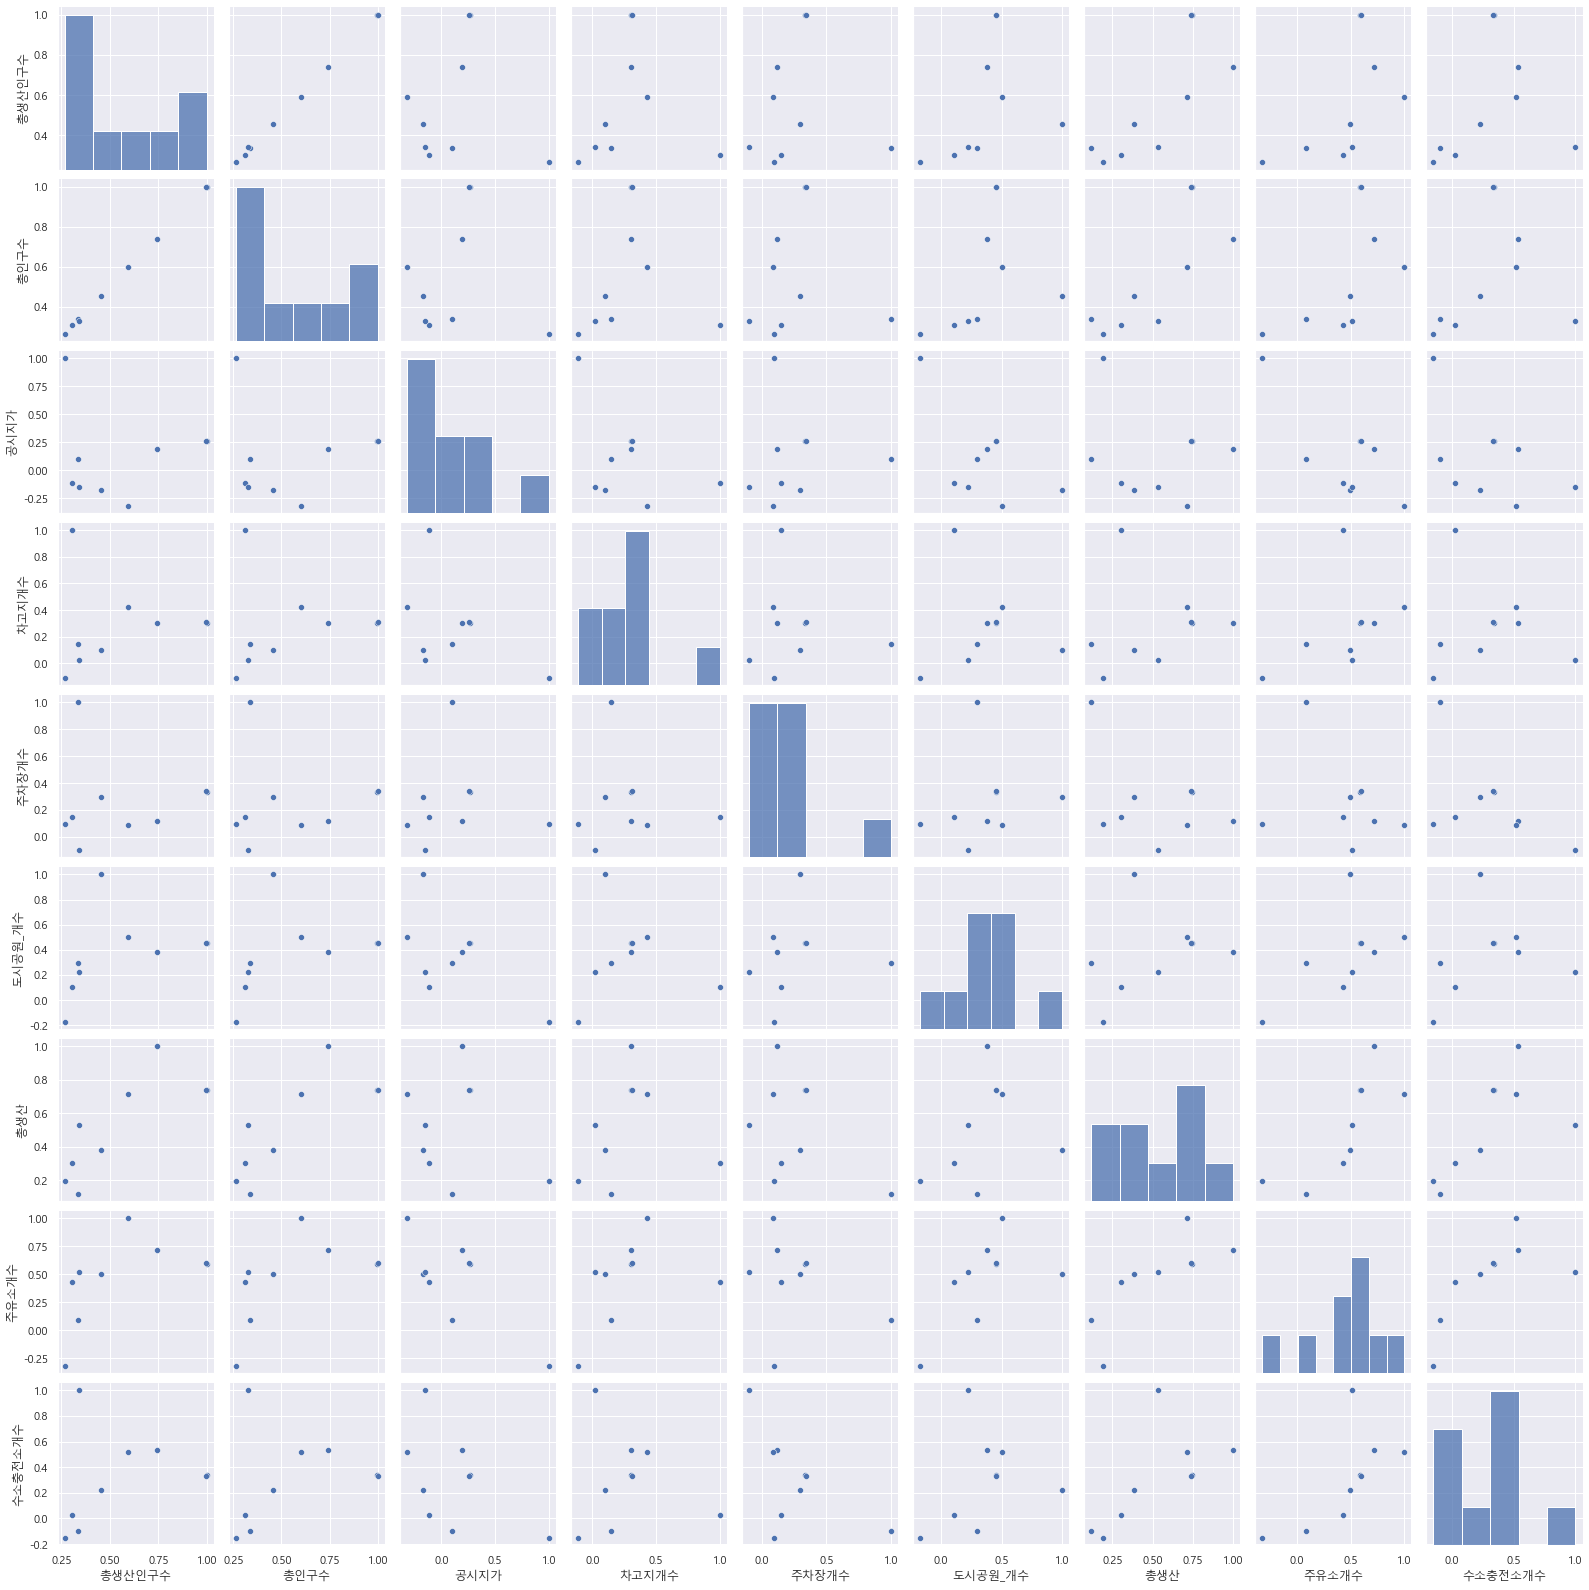

In [173]:
sns.pairplot(co, diag_kind = 'hist')
plt.show()

In [178]:
import scipy.stats as sp

corr_values, pval = sp.pearsonr(cor['수소충전소개수'], cor['총생산'])

print("총생산")
print('상관계수 : ', corr_values)
print('p_value : ', format(pval, '.55f'))

corr_values, pval = sp.pearsonr(cor['수소충전소개수'], cor['총생산인구수'])

print('')
print("총생산인구수")
print('상관계수 : ', corr_values)
print('p_value : ', format(pval, '.55f'))

print('')
corr_values, pval = sp.pearsonr(cor['수소충전소개수'], cor['총인구수'])

print("총인구수")
print('상관계수 : ', corr_values)
print('p_value : ', format(pval, '.55f'))
print("")

corr_values, pval = sp.pearsonr(cor['수소충전소개수'], cor['공시지가'])

print("공시지가")
print('상관계수 : ', corr_values)
print('p_value : ', format(pval, '.55f'))

print('')
corr_values, pval = sp.pearsonr(cor['수소충전소개수'], cor['차고지개수'])

print("차고지개수")
print('상관계수 : ', corr_values)
print('p_value : ', format(pval, '.55f'))
print('')

corr_values, pval = sp.pearsonr(cor['수소충전소개수'], cor['주차장개수'])

print("주차장개수")
print('상관계수 : ', corr_values)
print('p_value : ', format(pval, '.55f'))
print('')

corr_values, pval = sp.pearsonr(cor['수소충전소개수'], cor['도시공원_개수'])

print("도시공원_개수")
print('상관계수 : ', corr_values)
print('p_value : ', format(pval, '.55f'))


corr_values, pval = sp.pearsonr(cor['수소충전소개수'], cor['총생산'])

print('')
print("총생산")
print('상관계수 : ', corr_values)
print('p_value : ', format(pval, '.55f'))

corr_values, pval = sp.pearsonr(cor['수소충전소개수'], cor['주유소개수'])


print('')
print("주유소_개수")
print("총생산")
print('상관계수 : ', corr_values)
print('p_value : ', format(pval, '.55f'))


총생산
상관계수 :  0.5304552872517192
p_value :  0.0000000015133709727791939878954982057180332633006258902

총생산인구수
상관계수 :  0.34119335399066253
p_value :  0.0002171137847274681525414768978876622895768377929925919

총인구수
상관계수 :  0.3286154131522555
p_value :  0.0003799813351066241916102750320050063237431459128856659

공시지가
상관계수 :  -0.15098023252976273
p_value :  0.1104303619105268252642559900777996517717838287353515625

차고지개수
상관계수 :  0.024129367235364893
p_value :  0.7997399235498733327531795112008694559335708618164062500

주차장개수
상관계수 :  -0.09811410855026677
p_value :  0.3011979767010303787877489867241820320487022399902343750

도시공원_개수
상관계수 :  0.22425551033099303
p_value :  0.0169467787529016464254105756026547169312834739685058594

총생산
상관계수 :  0.5304552872517192
p_value :  0.0000000015133709727791939878954982057180332633006258902

주유소_개수
총생산
상관계수 :  0.518003512156757
p_value :  0.0000000042035835659702689351192103769331437357337222238
